Enter the path of dataset from Google Drive (Only for understanding)

In [ ]:
#Enter the path of dataset from google drive
import scipy.io as sio
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/My Drive/"

# Specify the path of the dataset
dataset_path = path + "data.mat"
test_image_path = path + "test.jpg"

# Load the dataset
mat_contents = sio.loadmat(dataset_path)
images = mat_contents['images']
label = mat_contents['C']
print(images.shape)

Mounted at /content/drive
(50, 3072)


Reshape the images of 'data.mat' and then read the data

In [ ]:
import numpy as np
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

Display the image from the Data set

(32, 32, 3)


(32, 32, 3)

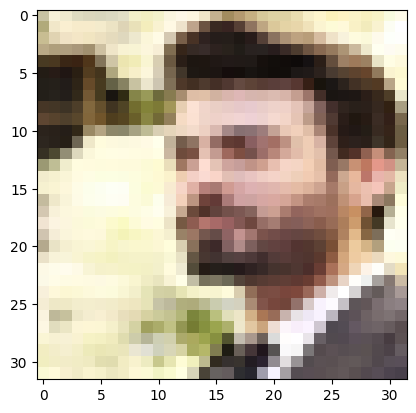

In [ ]:
from matplotlib import pyplot as plt
#import cv2
plt.imshow(im[:,:,:,40])
print(im[:,:,:,0].shape)
a= im[:,:,:,40]
plt.imshow(a)
a.shape

First, I added the path of my image "Talha.png" from Google Drive and then I resized and reshaped my image. I also calculated the Eucleadian distance of my image from the data set and show the index of closet image.

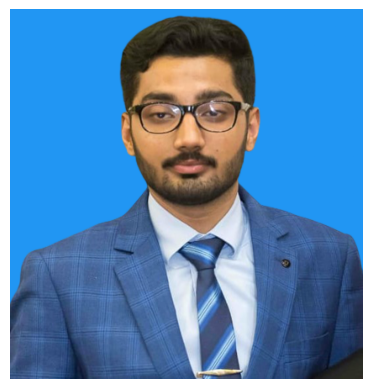

(440, 420, 4)


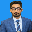

(50, 3072)
Index of the closest image: 0
Euclidean Distances:
[7681.21533353 8531.86023092 8207.88773071 8679.97638246 8284.03814574
 8080.98756341 8700.36401537 8733.04316948 8453.46751339 8114.6144702
 8383.59236843 8157.91431678 8211.88620233 8164.0121264  8288.83906226
 8382.66586475 8367.16361738 8052.27340569 7911.14151055 8137.28959789
 8506.07335966 7992.57899554 8303.21594324 8273.96561511 8153.74171776
 8004.99831355 7869.5235561  8038.10792413 8998.57472048 8390.69186659
 8054.06208071 8663.89779487 8103.26483585 8105.22929966 8485.44748378
 8265.32189331 8395.75029405 8346.27066419 8032.81943031 8274.71697401
 8341.23689869 8558.85792615 8451.27363183 8821.85966789 8124.45530482
 8524.87536566 8401.39321779 8253.99133753 8159.45439352 8414.35469897]


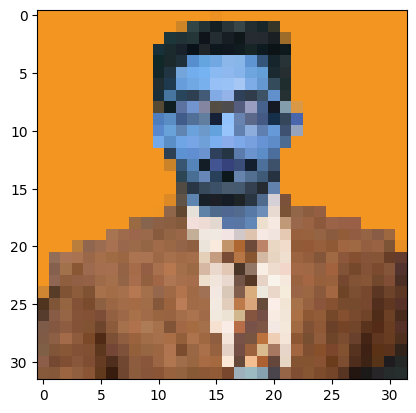

In [ ]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray


for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Enter the path to my image in Google Drive
image_path = '/content/drive/My Drive/Talha.png'

# Read and display my image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
print (img.shape)

#Resize my image
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (32, 32))
if resized_image.shape[-1] == 1:
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
cv2.imwrite('resized_image.png', resized_image)
cv2_imshow(resized_image)

#Reshape my image
import numpy as np
from matplotlib import pyplot as plt
num_images = images.shape[0]
height, width, channels = 32, 32, 3
print(images.shape)
plt.imshow (resized_image)


#Calculate Eucleadian distance between my image and dataset
from scipy.io import loadmat
data = loadmat('/content/drive/My Drive/data.mat')
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Flatten your image to a 1D array (1x3072)
your_image_flat = resized_image.reshape(1, -1)
images = data['images']

# Calculate Euclidean distances
distances = np.linalg.norm(images - your_image_flat, axis=1)
closest_index = np.argmin(distances)
print("Index of the closest image:", closest_index)

# Print the Euclidean distances for all images in the dataset
print("Euclidean Distances:")
print(distances)

Here, I print the closet image from the data set.

(32, 32, 3)


(32, 32, 3)

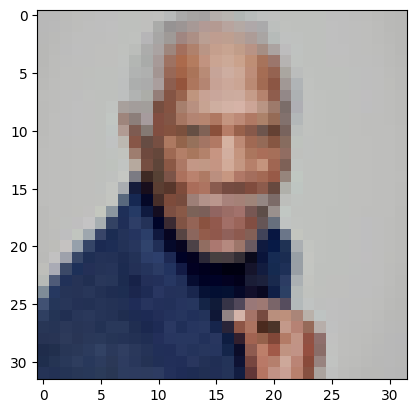

In [ ]:
from matplotlib import pyplot as plt
#import cv2

plt.imshow(im[:,:,:,0])
print(im[:,:,:,0].shape)
a= im[:,:,:,0]
plt.imshow(a)

a.shape

# **Code for 1-NN**

Index of the min_distance image: 0


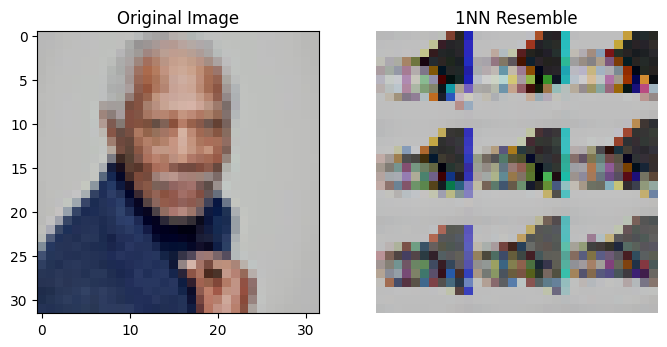

Min. Distance (1NN): 7681.215333526329


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Calculate the Euclidean distances
distances = np.linalg.norm(images - your_image_flat, axis=1)
min_distance_index = np.argmin(distances)

# Reshape the most similar image
resemble_image = images[min_distance_index].reshape(32, 32, 3)
print("Index of the min_distance image:", min_distance_index)

# Display the original and reshaped images
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(im[:, :, :, 0])
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(resemble_image)
plt.title("1NN Resemble")
plt.axis('off')
plt.show()

# Print the Euclidean distance for the 1NN
print(f"Min. Distance (1NN): {distances[min_distance_index]}")


# **Code for 3 NN**


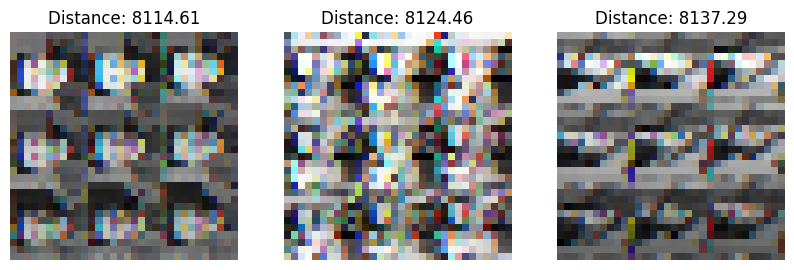

[9, 44, 19]


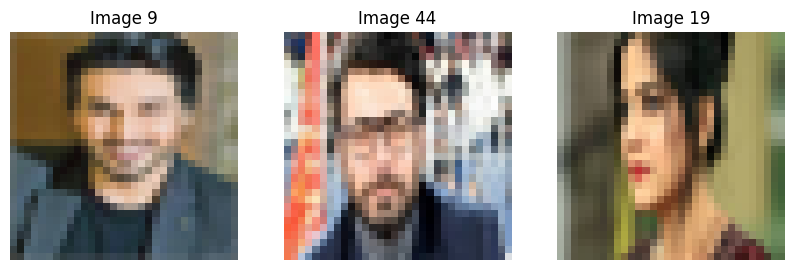

In [ ]:
# Define the value of k for 3NN
k_3nn = 3

# Create lists to store the k nearest neighbors' indices, distances, and instances for 3NN
nearest_indices_3nn = []
nearest_distances_3nn = []
nearest_instances_3nn = []

# Find the 3 nearest neighbors using a for loop
for i in range(k_3nn):
    min_distance_index = np.argmin(distances)
    nearest_indices_3nn.append(min_distance_index)
    nearest_distances_3nn.append(distances[min_distance_index])
    nearest_instances_3nn.append(images[min_distance_index].reshape(32, 32, 3))
    distances[min_distance_index] = np.inf

# Print the 3 minimum distances and display the corresponding images in one row
plt.figure(figsize=(10, 5))
for i in range(k_3nn):
    plt.subplot(1, k_3nn, i + 1)
    plt.imshow(nearest_instances_3nn[i])
    plt.title(f"Distance: {nearest_distances_3nn[i]:.2f}")
    plt.axis('off')
plt.show()

indices = []  # Initialize an empty list

# Iterate through nearest_indices_3nn and append each index to the indices list
for index in nearest_indices_3nn:
    indices.append(index)
print(indices)

# Display the images
plt.figure(figsize=(10, 4))
for i, index in enumerate(indices):
    plt.subplot(1, 3, i+1)
    plt.imshow(im[:,:,:,index])
    plt.axis('off')
    plt.title(f"Image {index}")
plt.show()

# **Code** for 5 NN

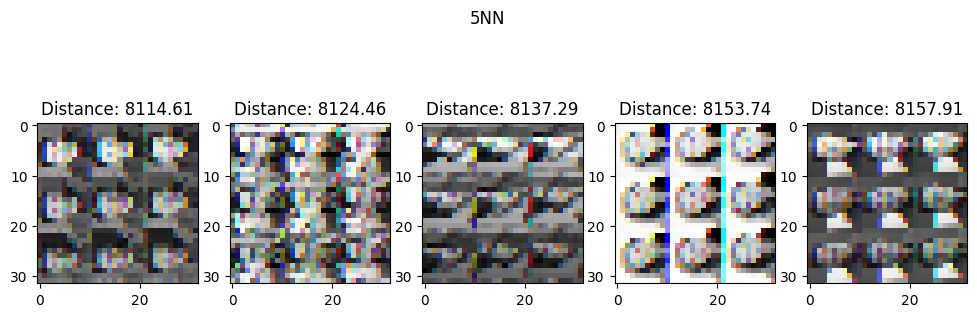

[9, 44, 19, 24, 11]


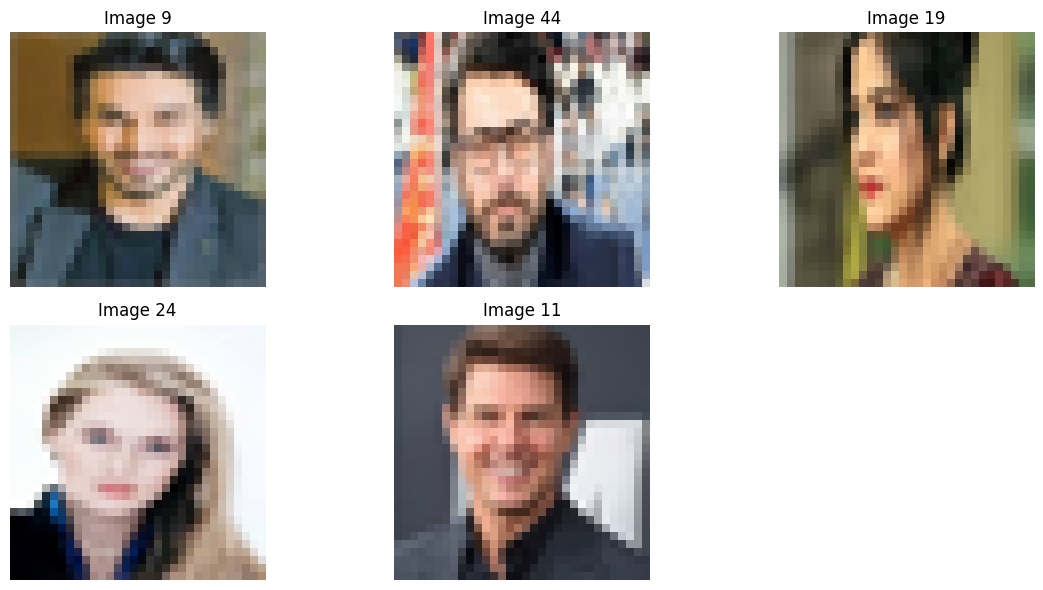

In [ ]:
# Define the value of k for 5NN
k_5nn = 5

# Create lists to store the k nearest neighbors' indices, distances, and instances for 5NN
nearest_indices_5nn = []
nearest_distances_5nn = []
nearest_instances_5nn = []

# Find the 5 nearest neighbors using a for loop
for i in range(k_5nn):
    min_distance_index = np.argmin(distances)
    nearest_indices_5nn.append(min_distance_index)
    nearest_distances_5nn.append(distances[min_distance_index])
    nearest_instances_5nn.append(images[min_distance_index].reshape(32, 32, 3))
    distances[min_distance_index] = np.inf

# Display the images of the 5 nearest neighbors for 5NN
plt.figure(figsize=(12, 4))
plt.suptitle("5NN")
for i in range(k_5nn):
    plt.subplot(1, k_5nn, i + 1)
    neighbor_image = nearest_instances_5nn[i]
    plt.imshow(neighbor_image)
    plt.title(f"Distance: {nearest_distances_5nn[i]:.2f}")

plt.show()

indices = []
for index in nearest_indices_5nn:
    indices.append(index)
print(indices)

# Display the images
plt.figure(figsize=(12, 6))
rows = (len(indices) // 3) + 1
columns = min(len(indices), 3)

for i, index in enumerate(indices):
    plt.subplot(rows, columns, i+1)
    plt.imshow(im[:,:,:,index])
    plt.axis('off')
    plt.title(f"Image {index}")

plt.tight_layout()
plt.show()

